In [40]:
import numpy as np
import pandas as pd
from pytorch_forecasting import TimeSeriesDataSet
from sklearn.preprocessing import StandardScaler
from pytorch_forecasting.data import MultiNormalizer,GroupNormalizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pool_data = pd.read_csv('PoolData.csv',on_bad_lines='skip')

In [3]:
# take a look at the data
pool_data.head()

,date,volumeUSDChange,volumeToken0Change,volumeToken1Change,tvlUSDChange,txCount,feesUSD
0,1708041600,-1.134062e+08,-1.134397e+08,-40444.288855,-1.340651e+06,6112,71218.096220
1,1708128000,-2.021456e+07,-2.022691e+07,-6543.765972,2.032085e+06,5318,61110.814054
2,1708214400,1.004206e+07,1.007014e+07,2807.137887,3.506131e+06,5947,66131.846264
3,1708300800,1.042544e+08,1.042212e+08,34278.399880,1.366455e+06,6827,118259.065975
4,1708387200,3.163059e+07,3.164884e+07,9927.220991,5.582752e+06,7136,134074.363181


In [4]:
# get some general information about the data
pool_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                990 non-null    int64  
 1   volumeUSDChange     990 non-null    float64
 2   volumeToken0Change  990 non-null    float64
 3   volumeToken1Change  990 non-null    float64
 4   tvlUSDChange        990 non-null    float64
 5   txCount             990 non-null    int64  
 6   feesUSD             990 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 54.3 KB


In [5]:
# get more statistical information about the data
pool_data.describe()

,date,volumeUSDChange,volumeToken0Change,volumeToken1Change,tvlUSDChange,txCount,feesUSD
count,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,990.000000,9.900000e+02
mean,1.712275e+09,4.886174e+05,3.172368e+05,1.098578e+05,3.886413e+05,1698.201010,6.078784e+04
std,2.470334e+06,7.328615e+07,6.627237e+07,2.944746e+07,1.031125e+07,2326.680401,9.994701e+04
min,1.708042e+09,-7.469638e+08,-7.463939e+08,-3.500031e+08,-8.136680e+07,6.000000,3.321232e+00
25%,1.710115e+09,-1.179282e+07,-1.906429e+06,-2.686228e+05,-1.062848e+06,248.250000,3.824943e+03
50%,1.712275e+09,-2.034204e+05,-4.715822e+01,-3.309524e+02,1.211091e+03,745.500000,2.861033e+04
75%,1.714435e+09,1.202061e+07,7.393220e+05,3.479959e+04,1.546306e+06,1385.750000,8.214568e+04
max,1.716509e+09,7.683531e+08,7.676765e+08,2.720772e+08,9.420977e+07,10561.000000,1.781509e+06


In [6]:
# Setting the stying of the Seaborn figure
sns.set_style('darkgrid')

/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

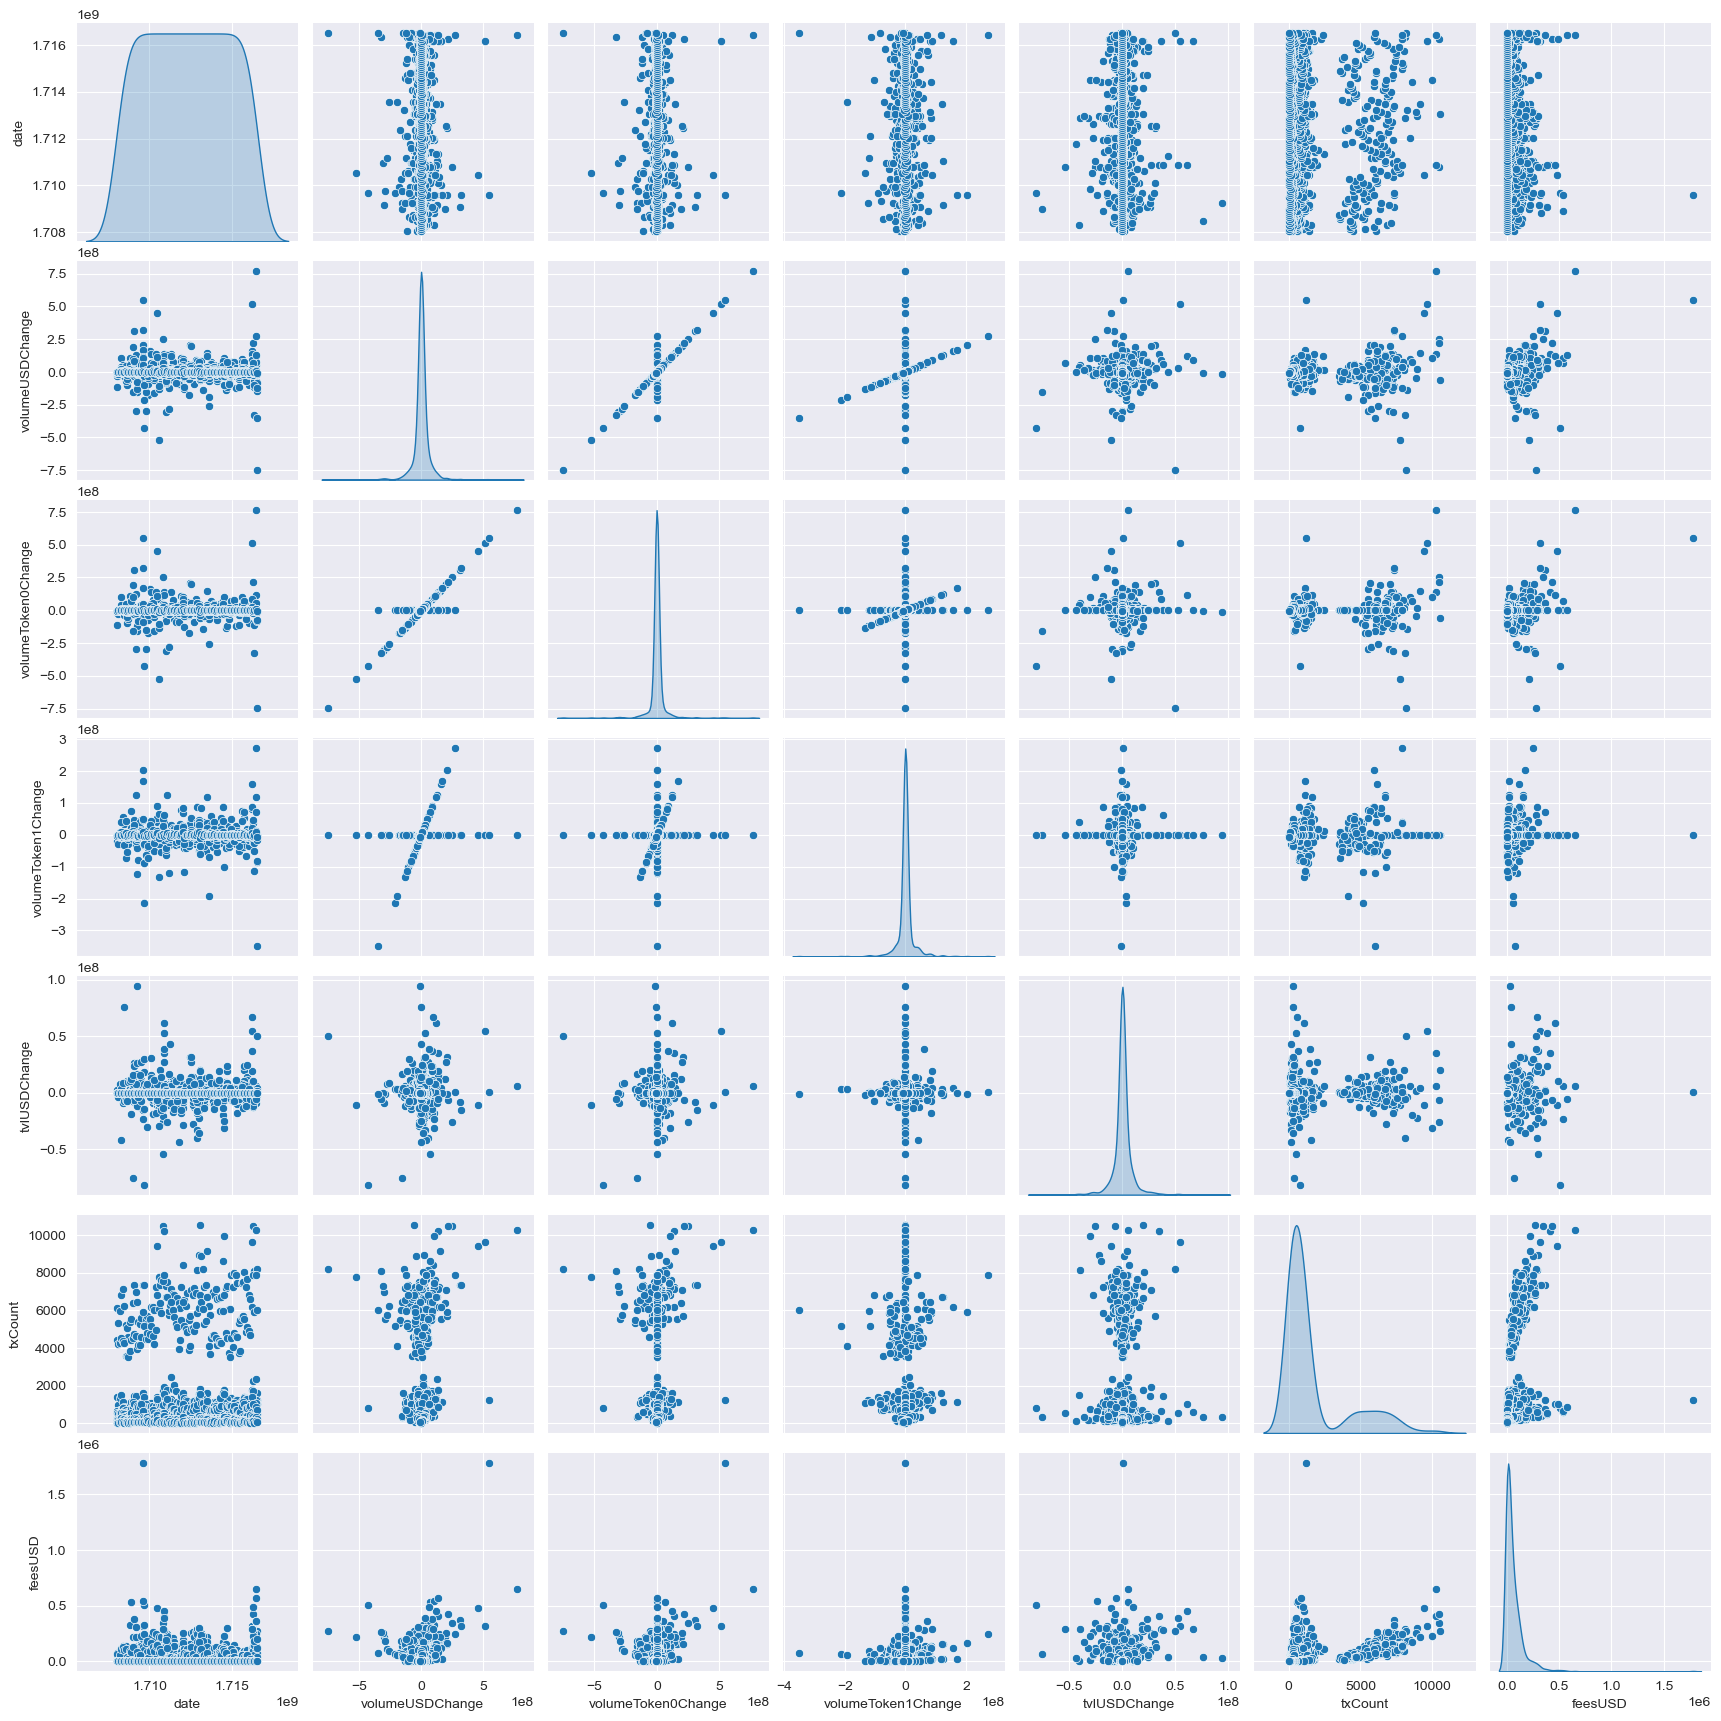

In [18]:
sns.pairplot(pool_data,kind='scatter',diag_kind='kde')

/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/msughter/anaconda3/envs/poolenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

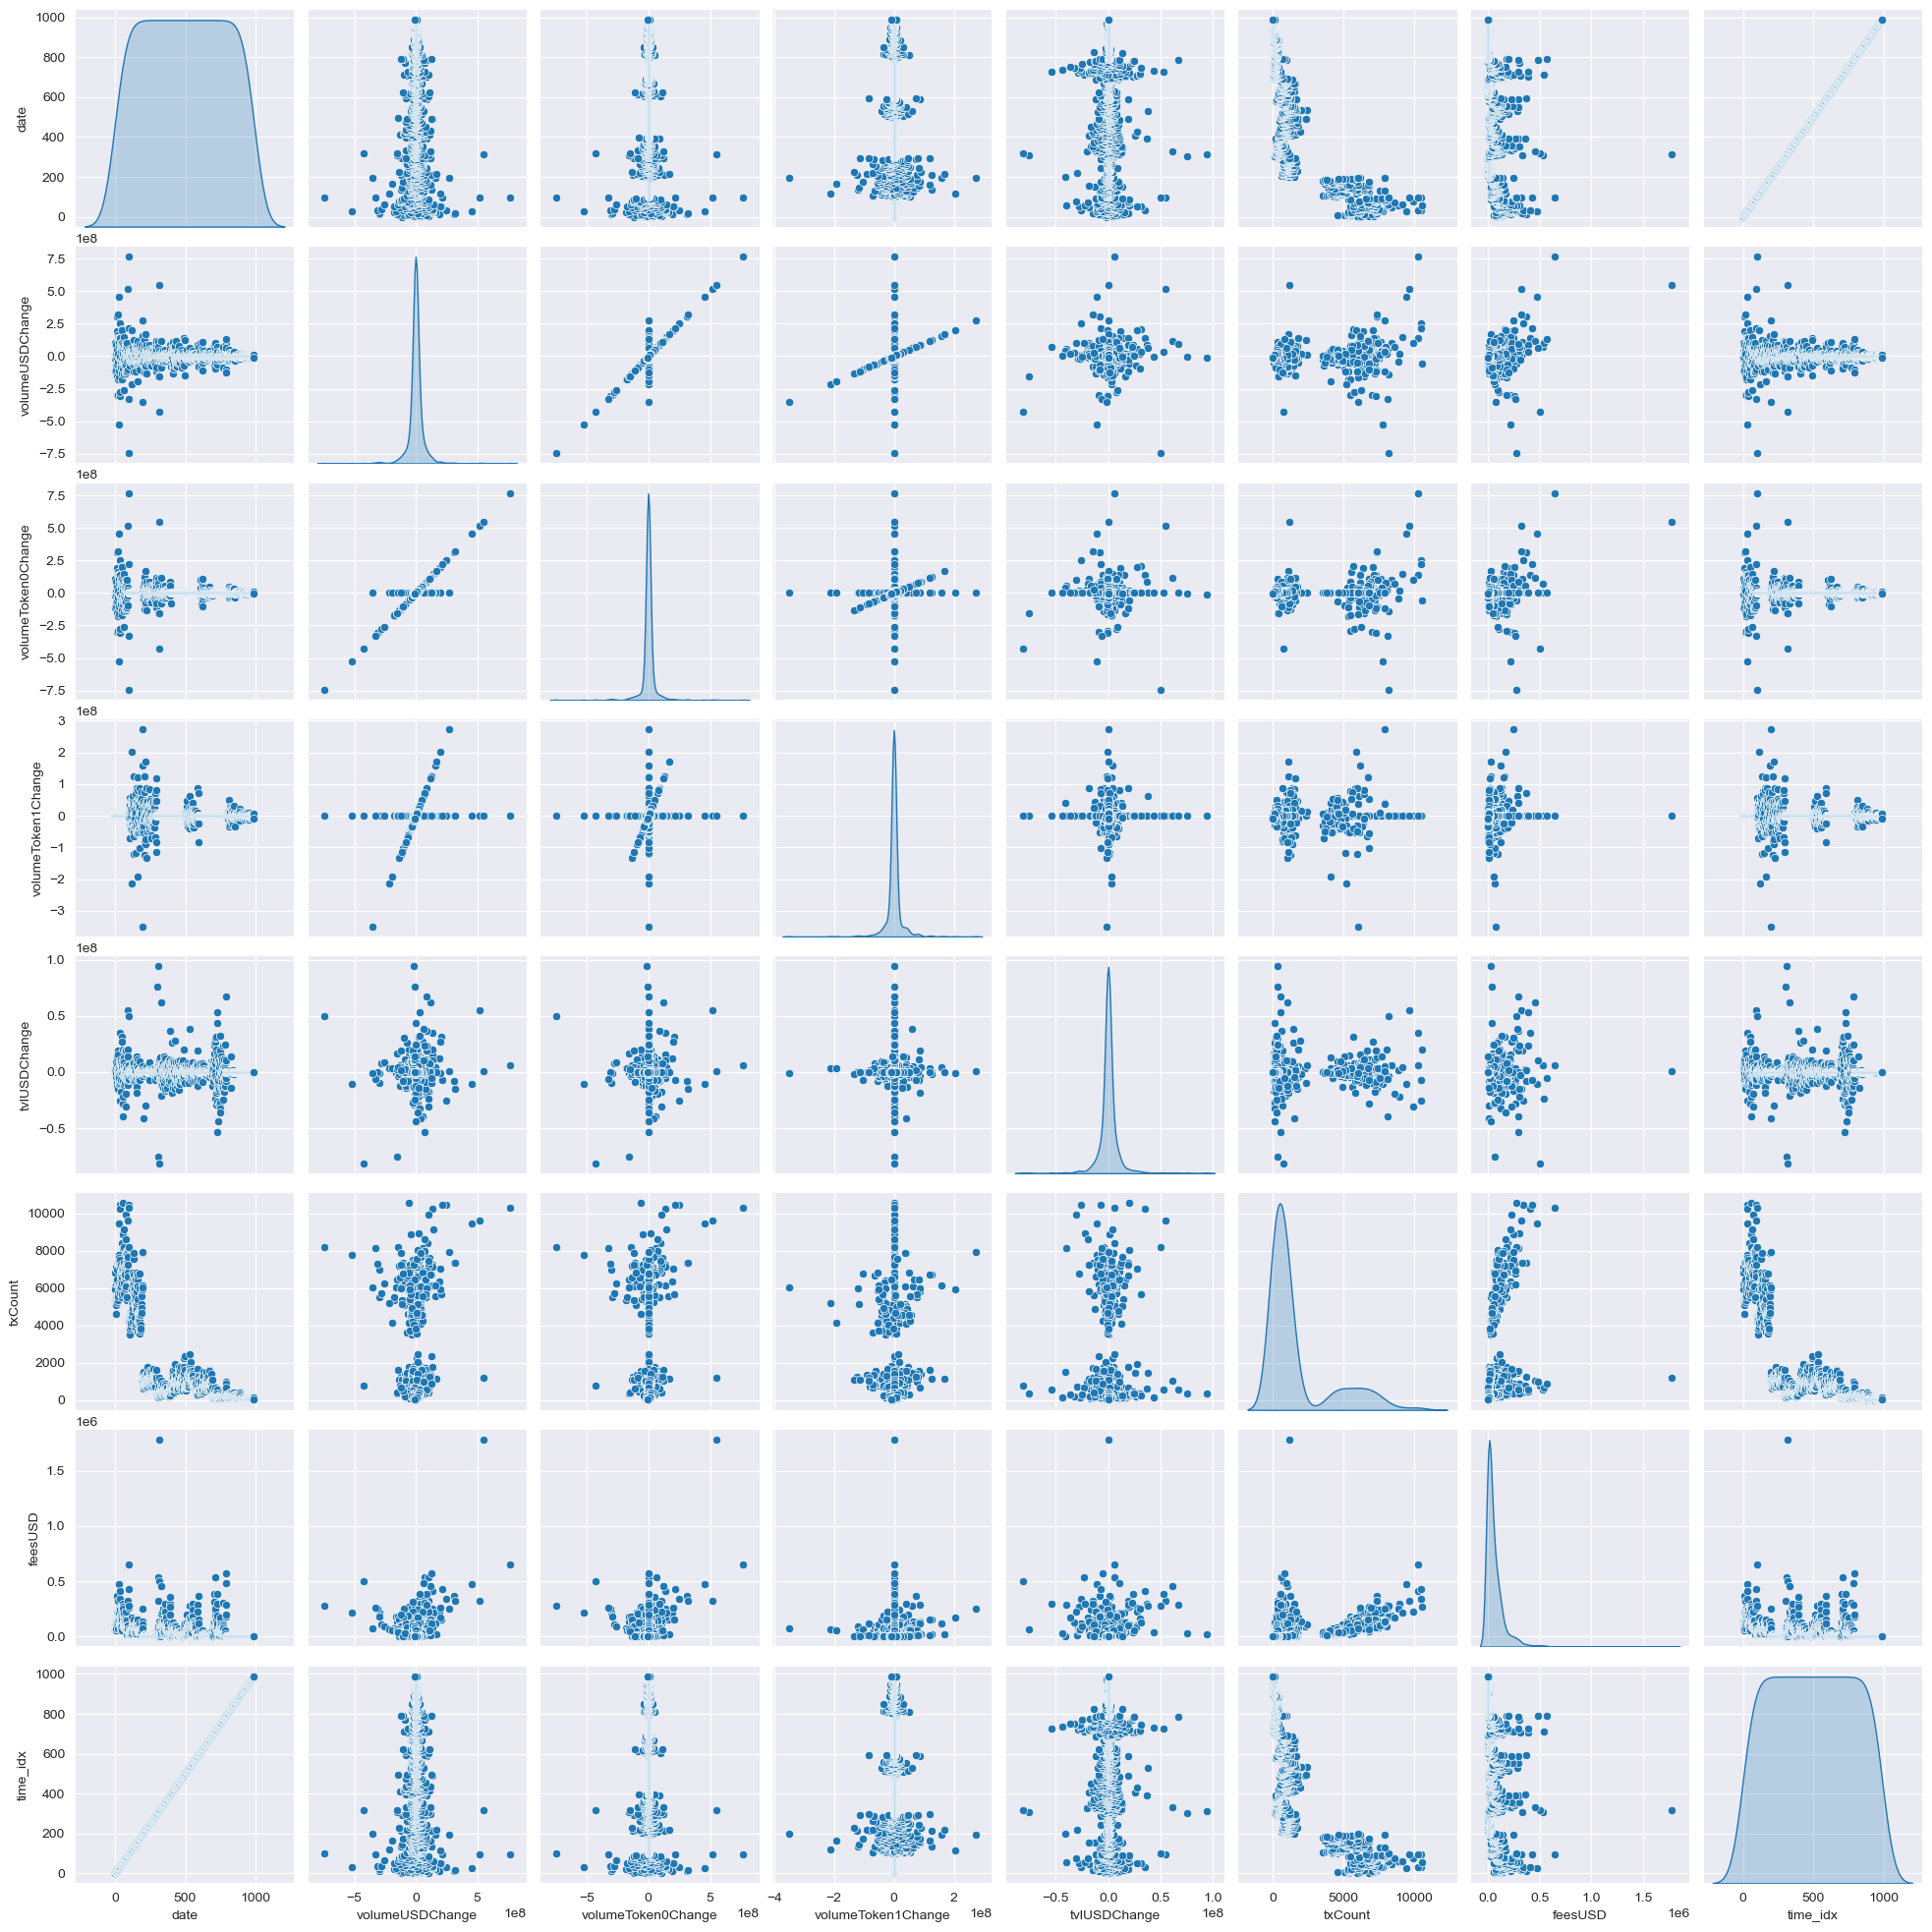

In [91]:
# make a new test data for visualization
test_pool_data = pool_data.copy()
test_pool_data['date'] = test_pool_data.index

# visualize 
sns.pairplot(test_pool_data,kind='scatter',diag_kind='kde')

In [9]:
# look at the correlation between the columns
correlation_matrix_df=pool_data.corr()
correlation_matrix_df


,date,volumeUSDChange,volumeToken0Change,volumeToken1Change,tvlUSDChange,txCount,feesUSD
date,1.000000,0.001319,0.002863,-0.003571,0.003187,0.043954,-0.016185
volumeUSDChange,0.001319,1.000000,0.904607,0.402519,0.072871,0.078571,0.318491
volumeToken0Change,0.002863,0.904607,1.000000,0.131593,0.060602,0.068529,0.280846
volumeToken1Change,-0.003571,0.402519,0.131593,1.000000,-0.000145,0.035057,0.077103
tvlUSDChange,0.003187,0.072871,0.060602,-0.000145,1.000000,0.024349,0.039870
txCount,0.043954,0.078571,0.068529,0.035057,0.024349,1.000000,0.400765
feesUSD,-0.016185,0.318491,0.280846,0.077103,0.039870,0.400765,1.000000


In [11]:
condition_met = correlation_matrix_df.apply(lambda row: row >0.1 ,axis=0)

In [13]:
# Get the pairs with the best correlations
condition_met_stacked = condition_met.stack()
true_pairs = condition_met_stacked[condition_met_stacked]
pairs = true_pairs.index.tolist()
pairs

[('date', 'date'),
 ('volumeUSDChange', 'volumeUSDChange'),
 ('volumeUSDChange', 'volumeToken0Change'),
 ('volumeUSDChange', 'volumeToken1Change'),
 ('volumeUSDChange', 'feesUSD'),
 ('volumeToken0Change', 'volumeUSDChange'),
 ('volumeToken0Change', 'volumeToken0Change'),
 ('volumeToken0Change', 'volumeToken1Change'),
 ('volumeToken0Change', 'feesUSD'),
 ('volumeToken1Change', 'volumeUSDChange'),
 ('volumeToken1Change', 'volumeToken0Change'),
 ('volumeToken1Change', 'volumeToken1Change'),
 ('tvlUSDChange', 'tvlUSDChange'),
 ('txCount', 'txCount'),
 ('txCount', 'feesUSD'),
 ('feesUSD', 'volumeUSDChange'),
 ('feesUSD', 'volumeToken0Change'),
 ('feesUSD', 'txCount'),
 ('feesUSD', 'feesUSD')]

### The Following columns have correlation greater than 1
* 'volumeUSDChange', 'volumeToken0Change'
* 'volumeUSDChange', 'volumeToken1Change'
* 'volumeUSDChange', 'feesUSD'
* 'volumeToken0Change', 'volumeToken1Change'
*  'volumeToken0Change', 'feesUSD'
*  'txCount', 'feesUSD
* 'volumeToken1Change', 'volumeUSDChange'
* 'volumeToken1Change', 'volumeToken0Change'
* 'feesUSD', 'volumeToken0Change'
* 'feesUSD', 'txCount'


In [81]:
# convert date ( in milliseconds ) to UTC time
pd.to_datetime(pool_data.date, unit='ms')

0     1970-01-20 18:27:21.600
1     1970-01-20 18:28:48.000
2     1970-01-20 18:30:14.400
3     1970-01-20 18:31:40.800
4     1970-01-20 18:33:07.200
                ...          
985   1970-01-20 20:42:43.200
986   1970-01-20 20:44:09.600
987   1970-01-20 20:45:36.000
988   1970-01-20 20:47:02.400
989   1970-01-20 20:48:28.800
Name: date, Length: 990, dtype: datetime64[ns]

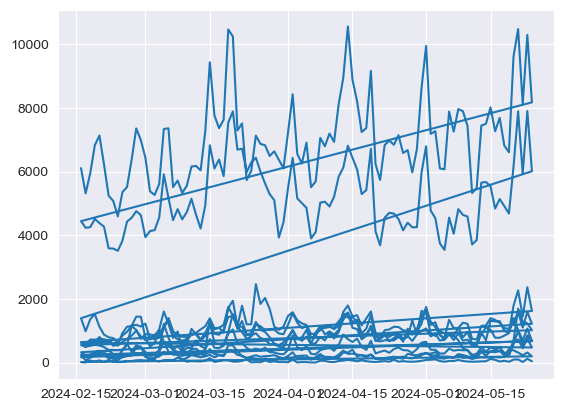

In [92]:
%matplotlib inline
# pool_data.plot(y=pool_data[['txCount']],x=np.log10(pool_data[['date']]))
plt.plot(pd.to_datetime(pool_data.date, unit='s'),pool_data[['txCount']],)

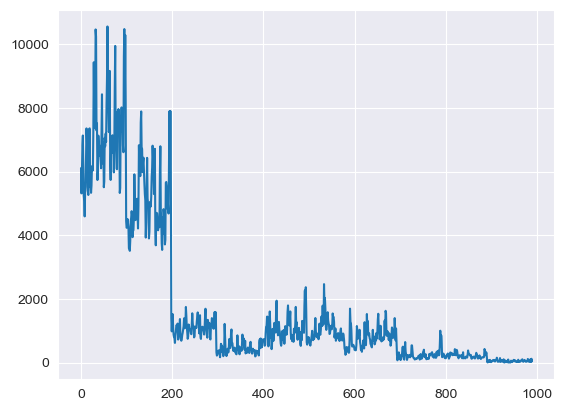

In [87]:
plt.plot(pool_data.index,pool_data[['txCount']],)

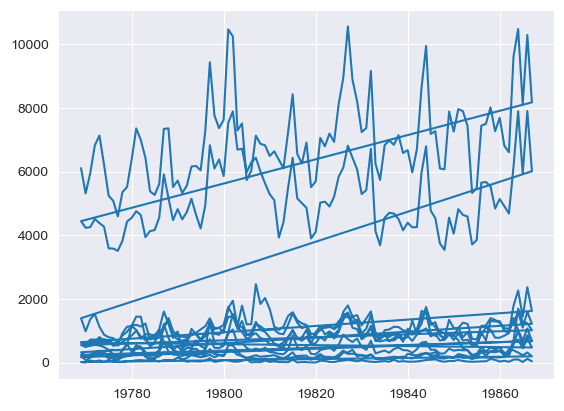

In [93]:
plt.plot(pool_data.date/86400,pool_data[['txCount']])

<Axes: >

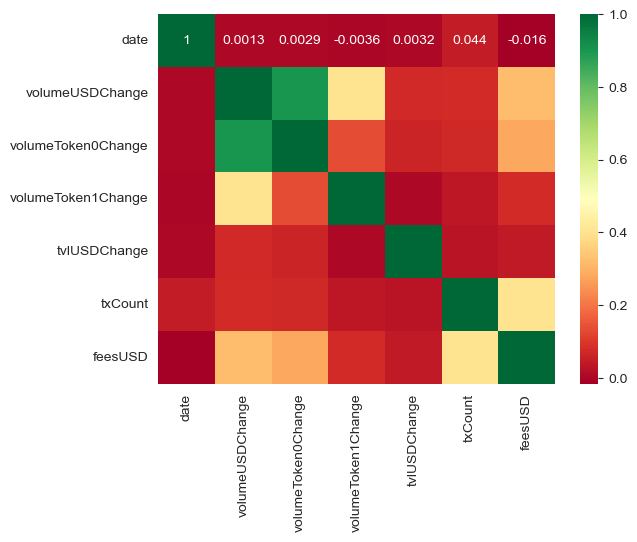

In [17]:
# get a correlation heatmap 
sns.heatmap(pool_data.corr(),cmap="RdYlGn",annot=True)

## Observations from the heatmap and correlation table
*  The columns volumeUSDChange, volumeToken0Change, volumenToken1Change, feesUSD and txCount have better correlation between each other
*  The columns date and tvlUSDChange don't produce good correlation with other columns ( should be removed )

### Data Preparation 
* creation of dataloaders
* splitting

In [19]:
# create a global time index
pool_data['time_idx'] = pool_data.index

In [20]:
pool_data.time_idx

0        0
1        1
2        2
3        3
4        4
      ... 
985    985
986    986
987    987
988    988
989    989
Name: time_idx, Length: 990, dtype: int64

In [21]:
df=pool_data.drop('date',axis=1)

In [22]:
df.columns

Index(['volumeUSDChange', 'volumeToken0Change', 'volumeToken1Change',
       'tvlUSDChange', 'txCount', 'feesUSD', 'time_idx'],
      dtype='object')

In [65]:
max_prediction_length = 2
max_encoder_length = 6
training_cutoff = df['time_idx'].max() - max_prediction_length

In [62]:
# define and fit the scalars
scaler_volumeUSDChange = StandardScaler()
scaler_volumeToken0Change = StandardScaler()
scaler_volumeToken1Change = StandardScaler()
scaler_txCount = StandardScaler()
scalar_feesUSD = StandardScaler()
scalar_tvlUSDChange = StandardScaler()

df['volumeUSDChange_scaled'] = scaler_volumeUSDChange.fit_transform(df[['volumeUSDChange']])
df['volumeToken0Change_scaled'] = scaler_volumeToken0Change.fit_transform(df[['volumeToken0Change']])
df['volumeToken1Change_scaled'] = scaler_volumeUSDChange.fit_transform(df[['volumeToken1Change']])
df['txCount_scaled'] = scaler_volumeUSDChange.fit_transform(df[['txCount']])
df['feesUSD_scaled'] = scaler_volumeUSDChange.fit_transform(df[['feesUSD']])
df['tvlUSDChange_scaled'] = scaler_volumeUSDChange.fit_transform(df[['tvlUSDChange']])

In [66]:
training_cutoff

987

In [71]:
training = TimeSeriesDataSet(
    df[lambda x: x.time_idx <= training_cutoff],
    time_idx='time_idx',
    target=['txCount','feesUSD'],
    group_ids=['time_idx'],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals = ['time_idx','volumeUSDChange','volumeToken1Change','tvlUSDChange','feesUSD'],
    time_varying_unknown_reals=['feesUSD','tvlUSDChange'],
     target_normalizer=GroupNormalizer(groups=["time_idx"], transformation="softplus"),
         add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    )

validation = TimeSeriesDataSet.from_dataset(training,df,predict=True,stop_randomization=True)

# create dataloaders for the model
batch_size = 8
training_dataloader = training.to_dataloader(train=True, batch_size=batch_size,num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

AssertionError: multiple targets / list of targets requires MultiNormalizer as target_normalizer but found GroupNormalizer(
	method='standard',
	groups=['time_idx'],
	center=True,
	scale_by_group=False,
	transformation='softplus',
	method_kwargs={}
)